In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import os
import datetime

import cv2

In [2]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

In [13]:
colors_rgb = np.array([
    [255, 0, 0], #rgb(255, 0, 0)
    [188, 25, 10], #rgb(188, 25, 10)
    [130, 25, 25], #rgb(130, 25, 25)

    [255, 90, 0], #rgb(255, 90, 0)
    [188, 65, 45], #rgb(188, 65, 45)
    [176, 90, 45], #rgb(176, 90, 45)

    [255, 150, 0], #rgb(255, 150, 0)
    [200, 150, 25], #rgb(200, 150, 25)
    [220, 200, 45], #rgb(220, 200, 45)

    [89, 150, 0], #rgb(89, 150, 0)
    [45, 150, 25], #rgb(45, 150, 25)
    [0, 200, 45], #rgb(0, 200, 45)

    [34, 34, 200], #rgb(34, 34, 200)
    [0, 90, 225], #rgb(0, 90, 225)
    [0, 46, 205], #rgb(0, 46, 205)

    [150, 150, 150], #rgb(150, 150, 150)
    [255, 255, 255], #rgb(255, 255, 255)
    [90, 90, 90], #rgb(90, 90, 90)
    ], dtype=np.float32)/255.0

In [14]:
np.random.shuffle(colors_rgb)

In [5]:
colors_rgb.shape

(18, 3)

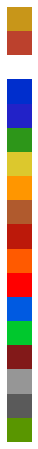

In [15]:
disp(colors_rgb[:, np.newaxis, :])

In [16]:
import matplotlib
colors_hsv = matplotlib.colors.rgb_to_hsv(colors_rgb)

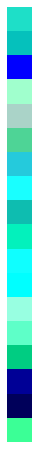

In [19]:
disp(colors_hsv[:, np.newaxis, :])

In [37]:
# sort by saturation
sorted_colors_hsv = sorted(colors_hsv, key=lambda x:x[1])

# sort by hue
sorted_colors_hsv = sorted(sorted_colors_hsv, key=lambda x:x[0])
hues = [x[0] for x in sorted_colors_hsv]

sorted_colors_rgb = matplotlib.colors.hsv_to_rgb(sorted_colors_hsv)


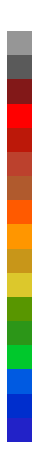

In [36]:
disp(sorted_colors_rgb[:, np.newaxis, :])

<BarContainer object of 18 artists>

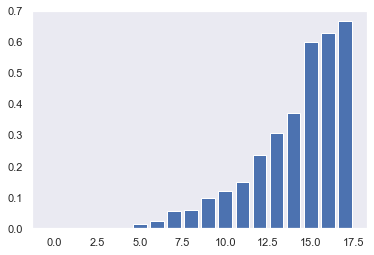

In [42]:
plt.bar(np.arange(len(hues)), hues)